In [18]:
from langgraph.graph import StateGraph,START, END

In [7]:
from typing import TypedDict

#define state
class BMIState(TypedDict):
    weight: float
    height: float
    bmi: float

In [12]:

def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight']
    height = state['height']
    bmi = weight / (height ** 2)
    state['bmi'] = round(bmi,2)
    return state

In [19]:
# Define your graph
graph= StateGraph(BMIState)

# add nodes to your graph
graph.add_node('calculate_bmi', calculate_bmi)

# add edges to your graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', END)

# Compile the graph
workflow=graph.compile()




In [20]:
# EXECUTE THE GRAPH
workflow.invoke({'weight': 70, 'height': 1.75})

{'weight': 70, 'height': 1.75, 'bmi': 22.86}

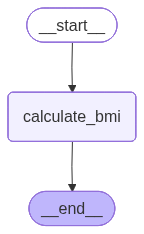

In [22]:
from IPython.display import Image
# Display the graph
Image(workflow.get_graph().draw_mermaid_png())

In [29]:
# now will add one more functionality : label- fit/overweight/obese based on bmi value
#define state
class BMIState(TypedDict):
    weight: float
    height: float
    bmi: float
    category: str

In [30]:
def label_bmi(state: BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        state['category'] = 'underweight'
    elif 18.5 <= bmi < 24.9:
        state['category'] = 'normal weight'
    elif 25 <= bmi < 29.9:
        state['category'] = 'overweight'
    else:
        state['category'] = 'obese'
    return state


In [31]:
# Define your graph
graph= StateGraph(BMIState)

# add nodes to your graph
graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('label_bmi', label_bmi)
# add edges to your graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'label_bmi')
graph.add_edge('label_bmi', END)


# Compile the graph
workflow=graph.compile()

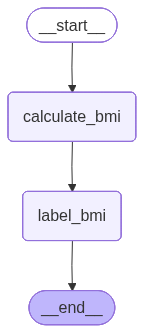

In [32]:
from IPython.display import Image
# Display the graph
Image(workflow.get_graph().draw_mermaid_png())

In [33]:
# EXECUTE THE GRAPH
initial_state = {'weight': 100, 'height': 1.80}
final_state = workflow.invoke(initial_state)
print(final_state)

{'weight': 100, 'height': 1.8, 'bmi': 30.86, 'category': 'obese'}
